# AI Lab Mini Project - BATCH 1
# Friend Suggestion System - MIC Algorithm

- Deepthishree G S (18Z312)
- Dhilip Sanjay S (18Z315)
- Indrajit K V (18Z322)
- Preetham B (18Z342)
- Swetha M (18Z360)

## Import the necessary library

In [ ]:
#start code here
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

## Load Data from CSV files

In [ ]:
namelist1 = pd.read_csv('/content/G1 NAMELIST.csv')
namelist2 = pd.read_csv('/content/G2 NAMELIST.csv')
namelist = pd.concat([namelist1, namelist2])

namelist.head()
namelist.tail()
print(len(namelist))

134


In [ ]:
namelist

,Roll No,Name
0,18z201,ADHAVAN ALEXANDER
1,18z202,ADWIN SANJO J
2,18z203,AISHVARYA G
3,18z204,AKILAN R
4,18z205,ANANTHAROOBAN B R
...,...,...
60,19z461,Rahul R
61,19z462,Naveen V
62,19z463,Vaishnavi M
63,19z464,Mouleeswaran S


## Preprocessing

In [ ]:
df = pd.read_csv("/content/Friend Suggestion.csv", encoding= 'unicode_escape')
edge_list_temp_df = df[['Roll No', 'Edges']]

df.head()

,Timestamp,Email Address,Roll No,City,Languages,Interests,Edges
0,10-07-2021 21:01,18z342@psgtech.ac.in,18Z342,Trichy,"English, Tamil, Kannada","Movies, Series, Cricket, Football, Other outdo...","18Z312,18Z315,18Z322,18Z360,18Z334,18Z326,18Z3..."
1,10-07-2021 22:07,18z360@psgtech.ac.in,18Z360,Coimbatore,"English, Tamil, Hindi, French","Movies, Shopping, Cricket, Music, Fitness/Work...","18Z312, 18Z315, 18Z320, 18Z322, 18Z326, 18Z334..."
2,10-08-2021 21:09,18z439@psgtech.ac.in,18Z439,Coimbatore,English,"Movies, Shopping, Travelling, Cooking, Eating ...","19Z432,19Z431,18Z231,18Z236,19Z433,19Z434"
3,10-08-2021 21:12,18z224@psgtech.ac.in,18Z224,Salem,"English, Tamil","Movies, Shopping, Fitness/Workout, Travelling,...","18Z201, 18Z230, 18Z248, 18Z251, 18Z253, 18Z257..."
4,10-08-2021 21:13,18z349@psgtech.ac.in,18Z349,Salem,"English, Tamil, Hindi, Kannada","Movies, Series, Cricket, Music, Coding, Photog...","18Z301,18Z306,18Z330,18Z334,18Z364,18Z209"


In [ ]:
edge_list_temp_df.head()

,Roll No,Edges
0,18Z342,"18Z312,18Z315,18Z322,18Z360,18Z334,18Z326,18Z3..."
1,18Z360,"18Z312, 18Z315, 18Z320, 18Z322, 18Z326, 18Z334..."
2,18Z439,"19Z432,19Z431,18Z231,18Z236,19Z433,19Z434"
3,18Z224,"18Z201, 18Z230, 18Z248, 18Z251, 18Z253, 18Z257..."
4,18Z349,"18Z301,18Z306,18Z330,18Z334,18Z364,18Z209"


### Preprocess Node List
1. Change the Roll numbers to upper case
1. Sort the nodes based on roll numbers


In [ ]:
tempNodeList = df['Roll No'].values.tolist()
nodeList = list()
for node in tempNodeList:
  nodeList.append(node.strip().upper())

edgeList = edge_list_temp_df.values.tolist()
for edge in edgeList:
  nodes = edge[1].split(',')
  for node in nodes:
    if node.strip() != '':
      nodeList.append(node.strip().upper())


# Before removing Duplicate entry
print(len(nodeList))

# After removing Duplicate entry
nodeList = list(set(nodeList))
nodeList.sort()
print(len(nodeList))
print(nodeList)

586
134
['16Z204', '17PW01', '18I225', '18Z201', '18Z202', '18Z203', '18Z204', '18Z205', '18Z206', '18Z207', '18Z208', '18Z209', '18Z210', '18Z212', '18Z213', '18Z214', '18Z217', '18Z218', '18Z219', '18Z220', '18Z221', '18Z222', '18Z224', '18Z225', '18Z226', '18Z227', '18Z228', '18Z229', '18Z230', '18Z231', '18Z233', '18Z234', '18Z235', '18Z236', '18Z237', '18Z238', '18Z239', '18Z240', '18Z241', '18Z242', '18Z243', '18Z244', '18Z245', '18Z246', '18Z247', '18Z248', '18Z249', '18Z250', '18Z251', '18Z252', '18Z253', '18Z254', '18Z255', '18Z256', '18Z257', '18Z258', '18Z259', '18Z260', '18Z261', '18Z262', '18Z263', '18Z264', '18Z265', '18Z301', '18Z302', '18Z303', '18Z304', '18Z306', '18Z307', '18Z308', '18Z309', '18Z310', '18Z311', '18Z312', '18Z313', '18Z314', '18Z315', '18Z316', '18Z317', '18Z318', '18Z319', '18Z320', '18Z321', '18Z322', '18Z323', '18Z324', '18Z325', '18Z326', '18Z327', '18Z329', '18Z330', '18Z331', '18Z332', '18Z333', '18Z334', '18Z335', '18Z336', '18Z337', '18Z338', '

### Helper Functions
1. Roll number -> Name
1. Roll number -> Node number
1. Node number -> Roll number

In [ ]:
def findName(roll):
  try:
    roll = roll.lower()
    res_df= namelist[namelist['Roll No']==roll]
    # print(roll, res_df)
    return str(res_df.iloc[0]['Name'])
  except:
    return roll

In [ ]:
labels = []

for i in range(len(nodeList)):
  name = nodeList[i]
  labels.append(name)

nodeIds = [i+1 for i in range(len(nodeList))]
labelsTempDict = dict()
labelsDict = dict()

for i in range(len(labels)):
  labelsDict[nodeIds[i]] = labels[i]
  labelsTempDict[labels[i]] = nodeIds[i]

### Preprocess Edge List
1. Split the friends list roll numbers
1. Create the dataframe of the required format

In [ ]:
edge_list_df = pd.DataFrame(columns = ['Edge ID', 'Node 1', 'Node 2'])
i = 0
for edge in edgeList:
  nodes = edge[1].split(',')
  for node in nodes:
    if node.strip() != '':
      edge_list_df = edge_list_df.append({'Edge ID': i, 
                                          'Node 1' : labelsTempDict[edge[0].strip().upper()], 
                                          'Node 2' : labelsTempDict[node.strip().upper()]
                                          }, ignore_index = True)
      i += 1
print(edge_list_df)

    Edge ID Node 1 Node 2
0         0    101     74
1         1    101     77
2         2    101     84
3         3    101    117
4         4    101     95
..      ...    ...    ...
519     519     77      6
520     520     77     20
521     521     77     37
522     522     77     38
523     523     77     50

[524 rows x 3 columns]


### Preprocess Interests & Languages

In [ ]:
#process interests as list of strings
df.columns
df['Interests'] = list(map(lambda x: x.split(', '), df['Interests'].values.tolist()))
df['Languages'] = list(map(lambda x: x.split(', '), df['Languages'].values.tolist()))

In [ ]:
df.head()

,Timestamp,Email Address,Roll No,City,Languages,Interests,Edges
0,10-07-2021 21:01,18z342@psgtech.ac.in,18Z342,Trichy,"[English, Tamil, Kannada]","[Movies, Series, Cricket, Football, Other outd...","18Z312,18Z315,18Z322,18Z360,18Z334,18Z326,18Z3..."
1,10-07-2021 22:07,18z360@psgtech.ac.in,18Z360,Coimbatore,"[English, Tamil, Hindi, French]","[Movies, Shopping, Cricket, Music, Fitness/Wor...","18Z312, 18Z315, 18Z320, 18Z322, 18Z326, 18Z334..."
2,10-08-2021 21:09,18z439@psgtech.ac.in,18Z439,Coimbatore,[English],"[Movies, Shopping, Travelling, Cooking, Eating...","19Z432,19Z431,18Z231,18Z236,19Z433,19Z434"
3,10-08-2021 21:12,18z224@psgtech.ac.in,18Z224,Salem,"[English, Tamil]","[Movies, Shopping, Fitness/Workout, Travelling...","18Z201, 18Z230, 18Z248, 18Z251, 18Z253, 18Z257..."
4,10-08-2021 21:13,18z349@psgtech.ac.in,18Z349,Salem,"[English, Tamil, Hindi, Kannada]","[Movies, Series, Cricket, Music, Coding, Photo...","18Z301,18Z306,18Z330,18Z334,18Z364,18Z209"


## Networkx Representation of Graph

In [ ]:
edgeList = edge_list_df.values.tolist()
G = nx.Graph()
G.add_nodes_from(nodeIds)
for i in range(len(edgeList)):
    G.add_edge(edgeList[i][1], edgeList[i][2])
# and we can easily retrieve the adjacency matrix 
AdjMatrix = nx.adjacency_matrix(G).A

nx.set_node_attributes(G, labels, "labels")

In [ ]:
print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]
[(1, 4), (2, 43), (3, 43), (4, 23), (4, 34), (4, 49), (4, 24), (4, 68), (4, 38), (4, 19), (4, 50), (4, 88), (4, 41), (4, 33), (4, 5), (4, 7), (4, 9), (4, 10), (4, 11), (4, 12), (4, 15), (4, 26), (4, 28), (4, 30), (4, 32), (4, 37), (4, 39), (4, 40), (4, 43), (4, 44), (4, 45), (4, 46), (4, 51), (4, 53), (4, 54), (4, 55), (4, 56), (4, 59), (4, 60), (4, 61), (4, 62), (4, 70), (4, 80), (4, 98), (4, 100), (4, 122), (4, 76), (4, 111), (4, 6

## Visualise the graph with networkx library

In [ ]:
nameDict = dict()
for key in labelsDict.keys():
  nameDict[key]=findName(labelsDict[key])

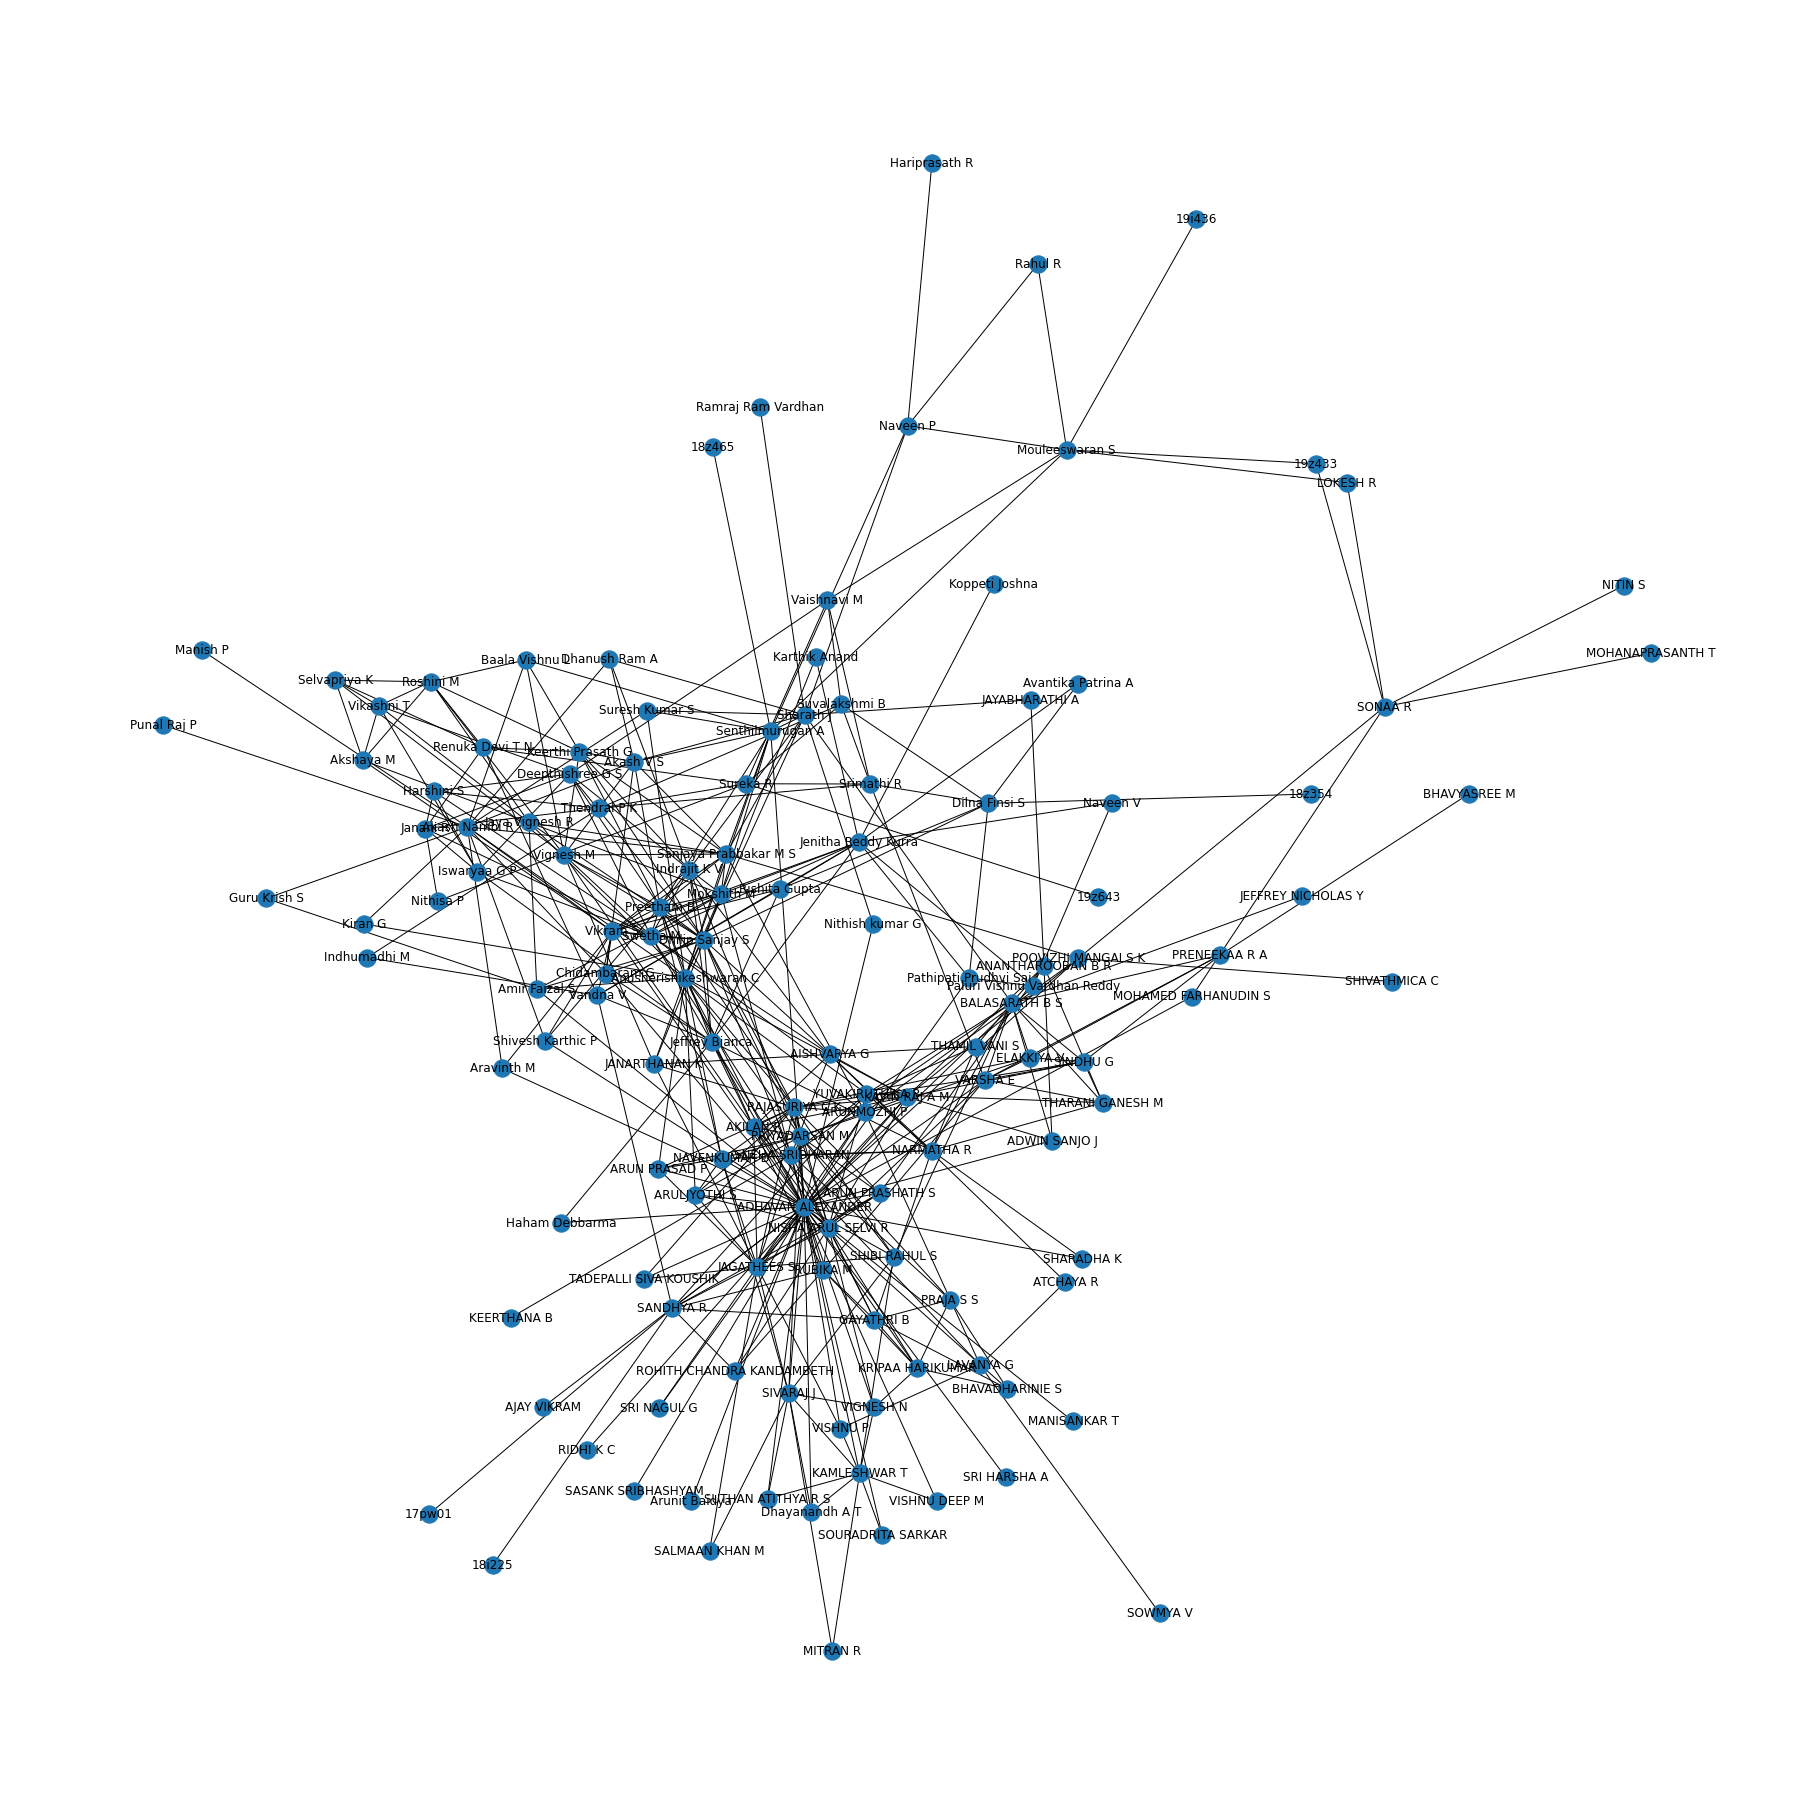

In [ ]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=True, labels = nameDict)
plt.savefig("visualise.png")

## MIC Algorithm
- Iterate through 2 to k levels of BFS:
  - Score based on similarities of location, interests, language is calculated.
  - The score is augmented if number of mutual friends is high.
  - The score is multiplied by the weight of the level. (Closer levels have higher weight)
  - The final scores are sorted in descending order and friends are suggested accordingly.


### Mutual Friends

In [ ]:
## BFS Code
def bfsForNode(G, sourceNode):
  dp1 = set(sorted(list(nx.bfs_tree(G, source=sourceNode, depth_limit=1))))
  dp2 = set(sorted(list(nx.bfs_tree(G, source=sourceNode, depth_limit=2))))
  dp3 = set(sorted(list(nx.bfs_tree(G, source=sourceNode, depth_limit=3))))
  dp4 = set(sorted(list(nx.bfs_tree(G, source=sourceNode, depth_limit=4))))
  dp4 = dp4.difference(dp3)
  dp3 = dp3.difference(dp2)
  dp2 = dp2.difference(dp1)
  dp1 = dp1.difference(set([sourceNode]))
  # print([findName(labelsDict[x]) for x in dp1])
  # print('--------------')
  return dp1, dp2, dp3, dp4

In [ ]:
def mutualFriendScore(G, sourceNode,dp1, dp2, dp3, dp4):   
  mutualScoreDict = dict()
  for node in dp2:
    dp1OfNode = set(sorted(list(nx.bfs_tree(G, source=node, depth_limit=1))))
    dp1OfNode = dp1OfNode.difference(set([node]))
    intersectionNodes = dp1OfNode.intersection(dp1)
    mutualScoreDict[node] = len(intersectionNodes)
  return mutualScoreDict

### Interest

In [ ]:
def calcInterestScore(sourceNode, depthList):
  sourceRollNo = labelsDict[sourceNode]
  tempInterestScoreDict = dict()
  for node in depthList:
      try:
        nodeRollNo = labelsDict[node]
        sourceNodeInterest = set(df.loc[df['Roll No'] == sourceRollNo]['Interests'].values.tolist()[0])
        nodeInterest = set(df.loc[df['Roll No'] == nodeRollNo]['Interests'].values.tolist()[0])
        intersections = sourceNodeInterest.intersection(nodeInterest)
        tempInterestScoreDict[node] = len(intersections)
      except:
        intersections = 0
        tempInterestScoreDict[node] = intersections
  return tempInterestScoreDict

def interestScore(sourceNode, dp1, dp2, dp3, dp4):   
  interestScoreDict = dict()
  interestScoreDict = calcInterestScore(sourceNode, dp2)
  interestScoreDict.update(calcInterestScore(sourceNode, dp3))
  interestScoreDict.update(calcInterestScore(sourceNode, dp4))

  return interestScoreDict

### Location

In [ ]:
def calcLocationScore(sourceNode, depthList):
  sourceRollNo = labelsDict[sourceNode]
  sourceNodeDF = df[df['Roll No'] == sourceRollNo]
  tempLocScoreDict = dict()
  for node in depthList:
      try:
        sourceNodeLoc = str(sourceNodeDF.iloc[0]['City'])
        nodeRollNo = labelsDict[node]
        nodeDF = df[df['Roll No'] == nodeRollNo]
        nodeLoc = str(nodeDF.iloc[0]['City'])
        if sourceNodeLoc.strip().upper() == nodeLoc.strip().upper():
          tempLocScoreDict[node] = 1
        else:
          tempLocScoreDict[node] = 0
      except:
        tempLocScoreDict[node] = 0
  return tempLocScoreDict

def locationScore(sourceNode, dp1, dp2, dp3, dp4 ):
  locationScoreDict = dict()
  locationScoreDict = calcLocationScore(sourceNode, dp2)
  locationScoreDict.update(calcLocationScore(sourceNode, dp3))
  locationScoreDict.update(calcLocationScore(sourceNode, dp4))

  return locationScoreDict

### Language

In [ ]:
def calcLanguageScore(sourceNode, depthList):
  sourceRollNo = labelsDict[sourceNode]
  tempLanguageScoreDict = dict()
  for node in depthList:
      try:
        nodeRollNo = labelsDict[node]
        sourceNodeLanguage = set(df.loc[df['Roll No'] == sourceRollNo]['Languages'].values.tolist()[0])
        nodeLanguage = set(df.loc[df['Roll No'] == nodeRollNo]['Languages'].values.tolist()[0])
        intersections = sourceNodeLanguage.intersection(nodeLanguage)
        tempLanguageScoreDict[node] = len(intersections)
      except:
        intersections = 0
        tempLanguageScoreDict[node] = intersections
  return tempLanguageScoreDict

def languageScore(sourceNode, dp1, dp2, dp3, dp4 ):
  languageScoreDict = dict()
  languageScoreDict = calcLanguageScore(sourceNode, dp2)
  languageScoreDict.update(calcLanguageScore(sourceNode, dp3))
  languageScoreDict.update(calcLanguageScore(sourceNode, dp4))

  return languageScoreDict

### Final Score

Suggestion Score = Mutual Friends score + ((Interest + Language + Location Scores) * Depth Factor)

In [ ]:
def printDictionary(friendList, dictionary):
  for node in friendList:
    print(findName(labelsDict[node]), dictionary[node])
  print('---'*30)

In [ ]:
def finalSuggestion(dictionary, sourceRollNo, k, printBool = True):
  sortedRank = sorted(dictionary, key=dictionary.get, reverse=True)
  finalSuggestionList = sortedRank[:k] 
  friendEdgeList = list()
  for node in finalSuggestionList:
    friendEdgeList.append((labelsTempDict[sourceRollNo], node))
  # print(friendEdgeList)
  if printBool:
    printDictionary(finalSuggestionList, dictionary)
  return friendEdgeList

In [ ]:
def friendSuggestionMain(graph, sourceRollNo, numberOfSuggestion, interestWeight = 5, 
                         languageWeight = 20, locationWeight = 30, mutualWeight = 80, printBool = True):
  sourceNode = labelsTempDict[sourceRollNo]
  dp1, dp2, dp3, dp4 = bfsForNode(graph, sourceNode)
  mutualFriendScoreDict = mutualFriendScore(graph, sourceNode, dp1, dp2, dp3, dp4)
  interestScoreDict = interestScore(sourceNode, dp1, dp2, dp3, dp4)
  languageScoreDict = languageScore(sourceNode, dp1, dp2, dp3, dp4)
  locationScoreDict = locationScore(sourceNode, dp1, dp2, dp3, dp4)

  mainScore = {}
  weights = [interestWeight, languageWeight, locationWeight, mutualWeight]
  depthFactors = [4, 3, 2]
  dicts = [interestScoreDict, languageScoreDict, locationScoreDict, mutualFriendScoreDict]
  for i in range(len(dicts)):
      
      for key, value in dicts[i].items():
        mainScore.setdefault(key, 0)
        
        # WITHOUT DEPTH FACTOR
        # mainScore[key] += weights[i]*value
  
        # WITH DEPTH FACTOR
        if i==len(dicts)-1:
          if key in dp2:
            mainScore[key] *= depthFactors[0]
          elif key in dp3:
            mainScore[key] *= depthFactors[1]
          elif key in dp4:
            mainScore[key] *= depthFactors[2]
          mainScore[key] += weights[i]*value
        else:
          mainScore[key] += weights[i]*value
 
  # Find the top n friends to be suggested
  if printBool:
    print("Suggestions for ", sourceRollNo, "-", findName(sourceRollNo))
  return finalSuggestion(mainScore, sourceRollNo, numberOfSuggestion, printBool)

### Suggestion for everyone

In [ ]:
def friendSuggestAll(G, numberOfSuggestion, interestWeight = 5, languageWeight = 20, locationWeight = 30, mutualWeight = 80):
  tempNodeList = df['Roll No'].values.tolist()
  finalNodeList = list()
  finalFriendSuggestionDict = dict()
  for node in tempNodeList:
    finalNodeList.append(node.strip().upper())
  
  for node in finalNodeList:
    # print(findName(node), node)
    finalFriendSuggestionDict[node] = friendSuggestionMain(G, node, numberOfSuggestion, 
                                                           interestWeight, languageWeight, 
                                                           locationWeight, mutualWeight)  
  suggestedEdgeList = list()
  for rollNo in finalFriendSuggestionDict.keys():
    suggestedEdgeList.extend(finalFriendSuggestionDict[rollNo])
  return suggestedEdgeList, finalFriendSuggestionDict

In [ ]:
suggestedEdgeList, finalFriendSuggestionDict = friendSuggestAll(G, 10)

Suggestions for  18Z342 - Preetham B
ADHAVAN ALEXANDER 1140
PRIYADARSAN M 800
Akash Nambi R 760
Jaya Vignesh R 600
Sharath J 600
Iswaryaa G P 580
NISHA ARUL SELVI R 560
Jenitha Reddy Kurra 560
ELAKKIYA V 540
Roshini M 540
------------------------------------------------------------------------------------------
Suggestions for  18Z360 - Swetha M
Keerthi Prasath G 760
ADHAVAN ALEXANDER 740
NARMATHA R 720
Vandna V 640
Sanjaya Prabbakar M S 620
SANDHYA R 520
GAYATHRI B 480
NISHA ARUL SELVI R 480
BALASARATH B S 460
PRAJA S S 420
------------------------------------------------------------------------------------------
Suggestions for  18Z439 - SONAA R
ADHAVAN ALEXANDER 360
Mouleeswaran S 320
Sanjaya Prabbakar M S 200
KAVIN RAJ A M 200
ARUNMOZHI P 80
SHIVATHMICA C 80
NARMATHA R 80
Sureka R 80
Suvalakshmi B 80
KRIPAA HARIKUMAR 75
------------------------------------------------------------------------------------------
Suggestions for  18Z224 - KAMLESHWAR T
JAGATHEES S 540
PRIYADARSAN M 500


## Accuracy Test Metric
1. Remove a certain percentage of the edges
1. Make this as the test graph
1. Run the Friend Suggestion Algorithm
1. Finally check the *accuracy* by comparing with the original graph

### Remove certain percentage of edges from edgelist

In [ ]:
def removeTestEdges(G, sourceNode, percent = 30):
  edgesList = list(G.edges(sourceNode))
  edgesRemovalCount = int(len(edgesList)*percent/100)
  edgesRemovedList = list()
  sortedNodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
  tempEdges = [edge[1] for edge in edgesList]

  # print("Edges Count", len(edgesList))
  # print("Edges Removal Count", edgesRemovalCount)
  i = 0
  
  # Edges based on highest degree
  for node in sortedNodes:
    if node[0] in tempEdges:
      edgesRemovedList.append((sourceNode, node[0]))
      i = i + 1
    if i == edgesRemovalCount:
      break

  #print("Edges List Removed", edgesRemovedList)
  return edgesRemovedList

### Accuracy Measure

In [ ]:
def measureAccuracy(G, sourceRollNo, numberOfSuggestion, percent = 30, printBool = True):
  Gtest = nx.Graph(G)
  sourceNode = labelsTempDict[sourceRollNo]
  edgeRemovedList = removeTestEdges(G, sourceNode, percent)
  Gtest.remove_edges_from(edgeRemovedList)
  tempEdgeList = friendSuggestionMain(Gtest, sourceRollNo, numberOfSuggestion, 5, 20, 30, 80, printBool)
  #print("Edges List Suggested", tempEdgeList)
  Gtest.add_edges_from(tempEdgeList)
  count = 0
  for edge in edgeRemovedList:
    if Gtest.has_edge(edge[0], edge[1]):
      count = count + 1
  return count/len(edgeRemovedList)

### Suggesting Friends for Test Graph & measuring the accuracy

In [ ]:
def accuracyMetric(G, numberOfSuggestion, percent = 30, printBool = True):
  finalAccuracy = 0

  tempRollNoList = df['Roll No'].values.tolist()
  rollNoList = list()
  for r in tempRollNoList:
    rollNoList.append(r.strip().upper())

  for rollNo in rollNoList:
    accuracy = measureAccuracy(G, rollNo, numberOfSuggestion, percent, printBool)
    print(rollNo, accuracy)
    finalAccuracy = finalAccuracy + accuracy

  finalAccuracy = finalAccuracy/len(rollNoList)
  return finalAccuracy

In [ ]:
print("FINAL ACCURACY = ", accuracyMetric(G, 10, 30, False))

18Z342 0.75
18Z360 1.0
18Z439 0.0
18Z224 0.6666666666666666
18Z349 0.6666666666666666
18Z239 0.8
18Z236 1.0
18Z251 1.0
18Z225 1.0
18Z234 1.0
18Z316 0.0
18Z203 0.6666666666666666
18Z306 1.0
18Z240 0.8
18Z219 0.8
18Z301 1.0
18Z327 1.0
18Z228 0.0
18Z323 1.0
19Z463 1.0
18Z364 0.6666666666666666
18Z330 1.0
18Z365 1.0
18Z252 0.6666666666666666
18Z334 1.0
18Z366 1.0
18Z363 1.0
18Z362 1.0
18Z312 1.0
18Z325 1.0
18Z359 1.0
18Z303 0.0
18Z356 0.5
18Z352 0.6666666666666666
18Z265 0.5
18Z355 0.0
18Z351 1.0
18Z326 1.0
18Z324 1.0
18Z212 0.75
18Z304 1.0
18Z338 1.0
18Z348 1.0
18Z302 0.75
18Z217 1.0
19Z464 0.5
18Z238 1.0
18Z261 0.5
18Z350 1.0
18Z250 1.0
18Z335 1.0
18Z243 1.0
18Z235 1.0
18Z233 0.6666666666666666
18Z227 1.0
18Z201 0.4666666666666667
18Z218 1.0
18Z237 0.0
18Z245 1.0
18Z205 1.0
18Z322 0.6666666666666666
18Z315 0.6
FINAL ACCURACY =  0.7911290322580646


## Gephi Visualise - Deepthi's Friends

In [ ]:
dp1, dp2, dp3, dp4 = bfsForNode(G, labelsTempDict['18Z312'])
for node in G.nodes():
  G.nodes[node]["name"]=findName(labelsDict[node]) 
  if node in dp1:
    G.nodes[node]["depth"]=1
  if node in dp2:
    G.nodes[node]["depth"]=2
  if node in dp3:
    G.nodes[node]["depth"]=3
  if node in dp4:
    G.nodes[node]["depth"]=4
  nodeFriends = [j for i,j in finalFriendSuggestionDict['18Z312']]
  if node in nodeFriends:
    G.nodes[node]["depth"]=-1
nx.write_gml(G, "/content/visualizeDeepthiFriends.gml")

## Future Scope for Improvement
- Sparse Graph can be improved
- Can be extended to intra and inter department